## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


In [2]:
import requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'  # Replace with the actual URL of your SQLite database

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a local file for writing
    with open('m4_survey_data.sqlite', 'wb') as f:
        # Write the content of the response to the file
        f.write(response.content)
    print('SQLite database downloaded successfully')

SQLite database downloaded successfully


Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


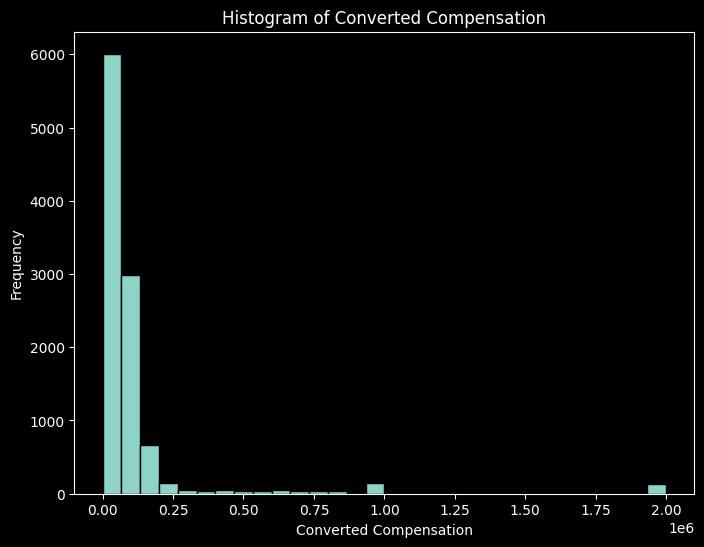

In [11]:
import sqlite3
import matplotlib.pyplot as plt

# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Create a cursor object
cursor = conn.cursor()

# Execute an SQL query to fetch the ConvertedComp column from a specific table
query = "SELECT ConvertedComp FROM master"
cursor.execute(query)

# Fetch the results and extract the data, filtering out None values
results = cursor.fetchall()
ConvertedComp = [row[0] for row in results if row[0] is not None]

# Create a histogram for the ConvertedComp data
plt.figure(figsize=(8, 6))
plt.hist(ConvertedComp, bins=30, edgecolor='k')
plt.xlabel("Converted Compensation")
plt.ylabel("Frequency")
plt.title("Histogram of Converted Compensation")

# Close the cursor and the database connection
cursor.close()
conn.close()

plt.show()

### Box Plots


Plot a box plot of `Age.`


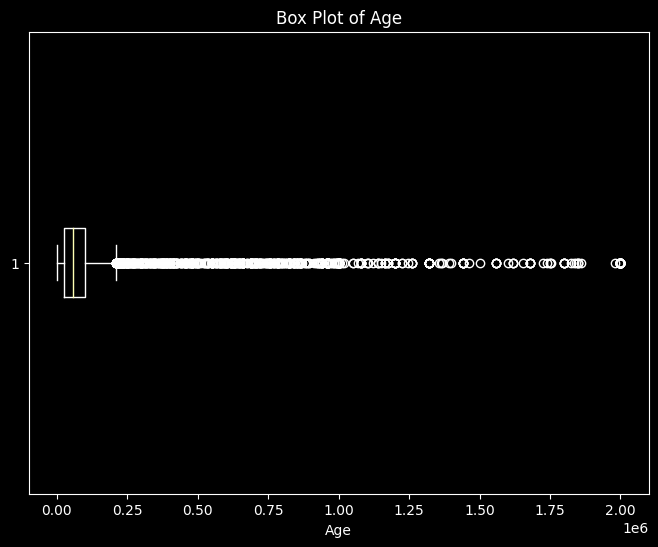

In [9]:
import sqlite3
import matplotlib.pyplot as plt

# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Create a cursor object
cursor = conn.cursor()

# Execute an SQL query to fetch the ConvertedComp column from a specific table
query = "SELECT ConvertedComp FROM master"
cursor.execute(query)

# Fetch the results and extract the data, filtering out None values
results = cursor.fetchall()
ages = [row[0] for row in results if row[0] is not None]

# Create a box plot for the Age data
plt.figure(figsize=(8, 6))
plt.boxplot(ages, vert=False)
plt.xlabel("Age")
plt.title("Box Plot of Age")

# Close the cursor and the database connection
cursor.close()
conn.close()

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


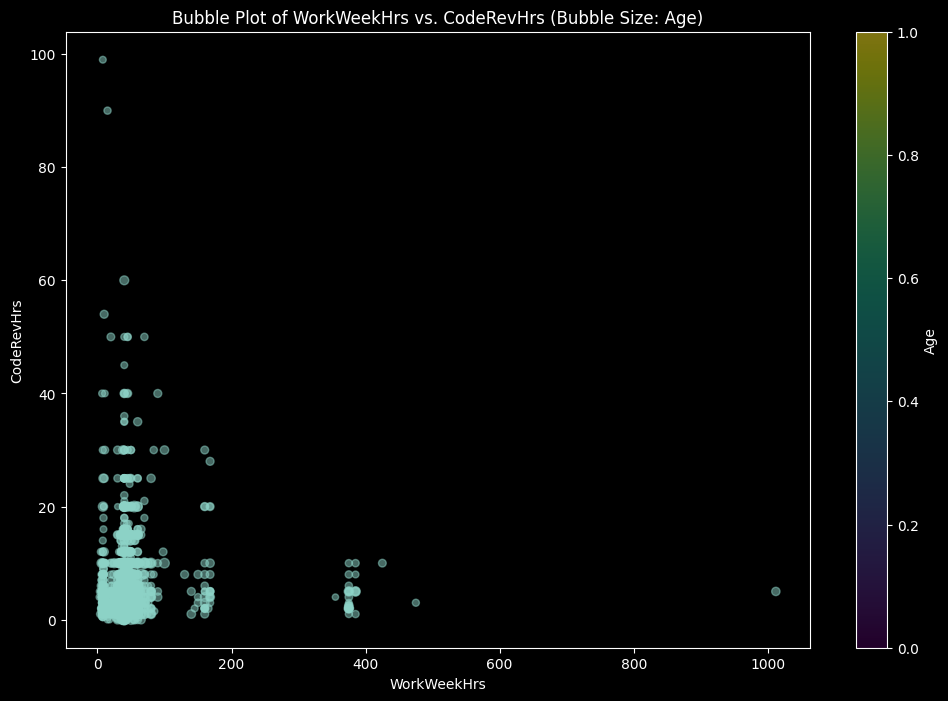

In [12]:
import sqlite3
import matplotlib.pyplot as plt

# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Create a cursor object
cursor = conn.cursor()

# Execute an SQL query to fetch the Age, WorkWeekHrs, and CodeRevHrs columns from a specific table
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
cursor.execute(query)

# Initialize lists to store Age, WorkWeekHrs, and CodeRevHrs data
ages = []
work_week_hrs = []
code_rev_hrs = []

# Iterate through the rows and fetch data
for row in cursor.fetchall():
    # Check if all three columns have values (not None)
    if len(row) >= 3 and row[0] is not None and row[1] is not None and row[2] is not None:
        ages.append(row[0])
        work_week_hrs.append(row[1])
        code_rev_hrs.append(row[2])

# Calculate bubble sizes based on the Age column
bubble_sizes = [age for age in ages]

# Create a bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(work_week_hrs, code_rev_hrs, s=bubble_sizes, alpha=0.5)
plt.xlabel("WorkWeekHrs")
plt.ylabel("CodeRevHrs")
plt.title("Bubble Plot of WorkWeekHrs vs. CodeRevHrs (Bubble Size: Age)")
plt.colorbar(label="Age")  # Add a colorbar showing the age values

# Show the bubble plot
plt.show()

# Close the cursor and the database connection
cursor.close()
conn.close()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


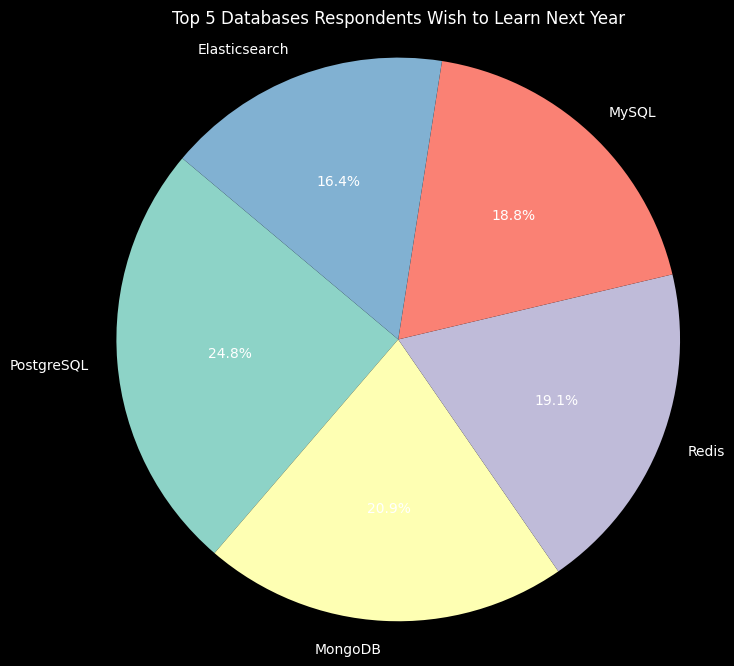

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Write your SQL query to select the desired column
query = """
    SELECT DatabaseDesireNextYear
    FROM DatabaseDesireNextYear
"""

# Use pd.read_sql_query to execute the query and read data into a DataFrame
df = pd.read_sql_query(query, conn)

# Count the occurrences of each database and select the top 5
top_databases = df['DatabaseDesireNextYear'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Databases Respondents Wish to Learn Next Year")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [16]:
import sqlite3
import pandas as pd

# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Write your SQL query to select the desired column
query = """
    SELECT LanguageDesireNextYear
    FROM LanguageDesireNextYear
"""

# Use pd.read_sql_query to execute the query and read data into a DataFrame
df = pd.read_sql_query(query, conn)

# Count the occurrences of each language and rank them
language_counts = df['LanguageDesireNextYear'].value_counts()
rank_of_python = language_counts.index.get_loc("Python") + 1

print(f"The rank of Python among the most popular languages respondents wish to learn next year is: {rank_of_python}")

import sqlite3
import pandas as pd

# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Write your SQL query to select the desired column
query = """
    SELECT *
    FROM DatabaseWorkedWith
"""

# Use pd.read_sql_query to execute the query and read data into a DataFrame
df = pd.read_sql_query(query, conn)

# Filter the DataFrame to select respondents who work on 'MySQL' only
mysql_only_respondents = df[df['DatabaseWorkedWith'] == 'MySQL']

# Get the number of respondents who work on 'MySQL' only
count_mysql_only_respondents = len(mysql_only_respondents)

print(f"The number of respondents who work on 'MySQL' only is: {count_mysql_only_respondents}")



The rank of Python among the most popular languages respondents wish to learn next year is: 3
The number of respondents who work on 'MySQL' only is: 5469


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


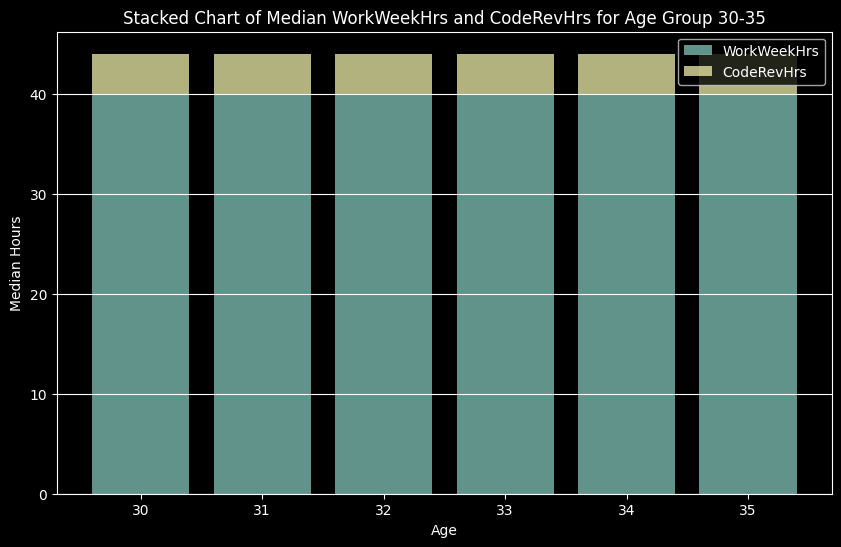

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Create a cursor object
cursor = conn.cursor()

# Define the age group (30 to 35)
age_group_query = """
    SELECT Age, WorkWeekHrs, CodeRevHrs
    FROM master
    WHERE Age >= 30 AND Age <= 35
"""

# Execute the query and fetch the data into a DataFrame
age_group_df = pd.read_sql_query(age_group_query, conn)

# Group the data by Age and calculate the median values for WorkWeekHrs and CodeRevHrs
median_data = age_group_df.groupby('Age').median()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_data.index, median_data['WorkWeekHrs'], label='WorkWeekHrs', alpha=0.7)
plt.bar(median_data.index, median_data['CodeRevHrs'], label='CodeRevHrs', bottom=median_data['WorkWeekHrs'], alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.legend()
plt.grid(True, axis='y')

# Show the chart
plt.show()

# Close the cursor and the database connection
cursor.close()
conn.close()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


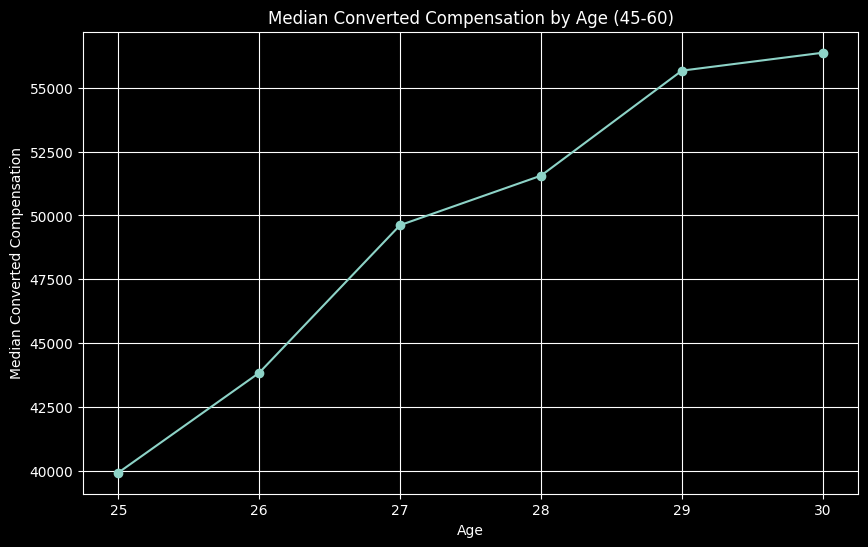

In [23]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Create a cursor object
cursor = conn.cursor()

# Define the age range (45 to 60)
age_range_query = """
    SELECT Age, ConvertedComp
    FROM master
    WHERE Age >= 25 AND Age <= 30
"""

# Execute the query and fetch the data into a DataFrame
age_range_df = pd.read_sql_query(age_range_query, conn)

# Group the data by Age and calculate the median ConvertedComp values
median_data = age_range_df.groupby('Age').median()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(median_data.index, median_data['ConvertedComp'], marker='o', linestyle='-')

plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.title('Median Converted Compensation by Age (45-60)')
plt.grid(True)

# Show the chart
plt.show()

# Close the cursor and the database connection
cursor.close()
conn.close()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


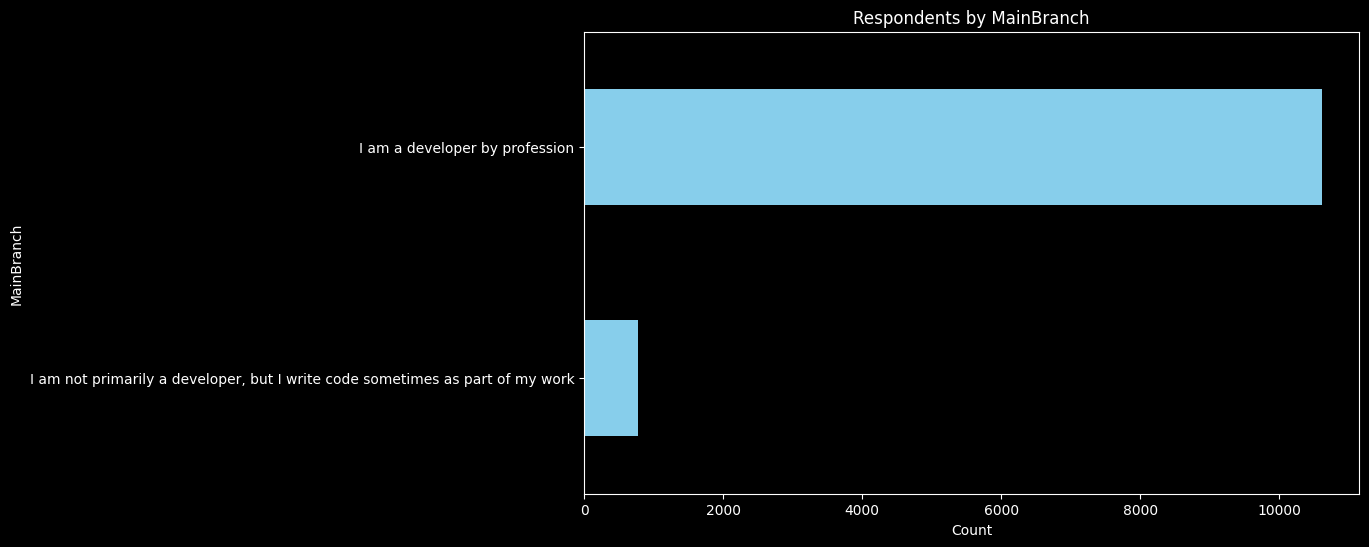

In [22]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt


# Establish a connection to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")  # Replace with your database file name

# Create a cursor object
cursor = conn.cursor()

# Define the SQL query based on the "MainBranch" column
main_branch_query = """
    SELECT MainBranch
    FROM Master
"""

# Execute the query and fetch the data into a DataFrame
main_branch_df = pd.read_sql_query(main_branch_query, conn)

# Now you have a DataFrame with the data filtered based on the "MainBranch" column

# Close the cursor and the database connection
cursor.close()
conn.close()

# Create a horizontal bar chart using column `MainBranch`
plt.figure(figsize=(10, 6))
main_branch_counts = main_branch_df['MainBranch'].value_counts()
main_branch_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.title('Respondents by MainBranch')

plt.gca().invert_yaxis()  # Invert the y-axis to have the most common branch at the top

# Show the chart
plt.show()





Close the database connection.


In [24]:
conn.close()